In [2]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    figure(1, (15, 5))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    figure(1, (15, 5))
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    #subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    #response = signal.filtfilt(b, a, impulse)#, padlen=None)
    response = signal.lfilter(b,a,impulse)
    figure(1, (15, 5))
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    figure(1, (15, 5))
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    #subplots_adjust(hspace=0.5)

In [53]:
sampleRate = 1000
nyq = sampleRate/2.0
f1 = 15 # FRECUENCIAS DE CORTE
f2 = 30 # FRECUENCIAS DE CORTE
# band pass freqs expressed as Nyquist
#Wn = np.array([f1/nyq, f2/nyq])
N, Wn = signal.buttord([f1/nyq, f2/nyq], [10/nyq, 60/nyq], 3, 40, False)

In [54]:
N

6

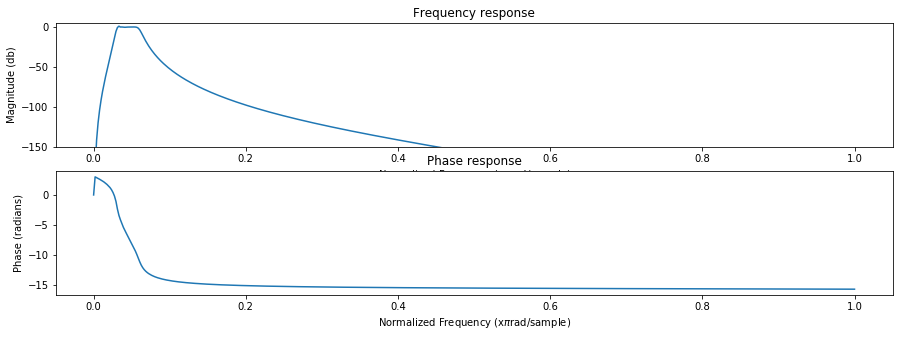

In [56]:
#n = 1001
#a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = False)
#N = 6 # ORDEN DEL FILTRO
#sr
#sampleRate = 1000
#nyq = sampleRate/2.0
#f1 = 5 # FRECUENCIAS DE CORTE
#f2 = 18.5 # FRECUENCIAS DE CORTE
# band pass freqs expressed as Nyquist
#Wn = np.array([f1/nyq, f2/nyq])
# design parameters for the butter filter
#Butter es un filtro pasabanda Butterworth. N es el orden del filtro, Wn el rango, analog se elige Falso
# para obtener un filtro digital. b es el denominador y a el numerador.  
b,a = signal.butter(N, Wn, btype='bandpass', analog=False)
mfreqz(b,a) #Plot frequency and phase response

show()

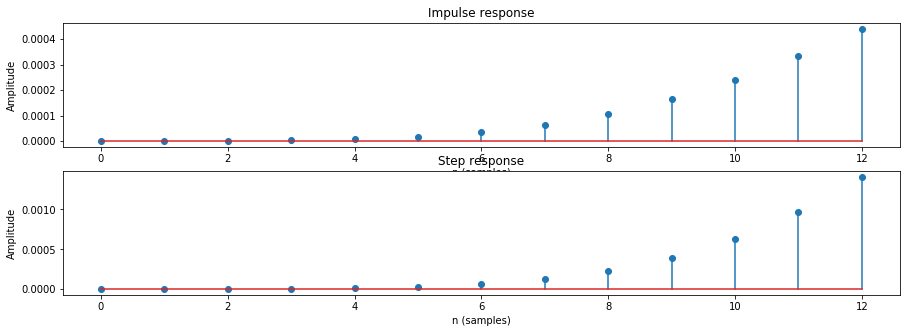

In [57]:
impz(b,a) #Plot step and impulse response
show()

In [9]:
print (f1/nyq)

0.01


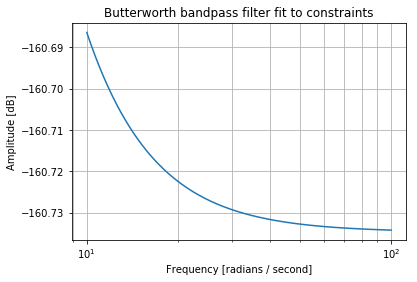

In [55]:
b, a = signal.butter(N, Wn, 'band', False)
w, h = signal.freqs(b, a, np.logspace(1, 2, 500))
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth bandpass filter fit to constraints')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
#plt.fill([1,  14,  14,   1], [-40, -40, 99, 99], '0.9', lw=0) # stop
#plt.fill([20, 20,  50,  50], [-99, -3, -3, -99], '0.9', lw=0) # pass
#plt.fill([60, 60, 1e9, 1e9], [99, -40, -40, 99], '0.9', lw=0) # stop
#plt.axis([0, 100, 60, 1000])
plt.show()